# Assignment 1 (k-NN Classification)

![KNN](KNN.png )

[Ref](https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6)

# Summery:

## KNN Vanilla & Ball Models

**List of HyperPrameters**

* methods = ["vanilla" , "ball"] 
* metrics = ["euclidean", "cityblock", "cosine", "chebyshev", "sqeuclidean"] 
* k_values = [1 , 3 , 5 , 7 , 9 , 11 , 13 , 15 , 17 , 19] )
* e_values = [0.1 , 0.5, 0.8 , 1 , 2 , 5 , 7 , 10 , 15 ,20 ] 

**Prediction on the validation dataset:**

The accuracy and optimum hyper prameters were achived as below:

* methods       vanilla
* metrics     euclidean
* k_values         19.0
* Accuracy        0.637 

* methods          ball
* metrics     euclidean
* e_values        0.500
* Accuracy        0.500 

Prediction was conducted on validation dataset using different combinations of hyperprameters, to choose the optimum one. As a result, the above combinations were achive for each of Vanilla and Ball methods.

**Prediction on the train dataset:**

The accuracy and optimum hyper prameters were achived as below:

* methods       vanilla
* metrics     euclidean
* k_values          1.0
* Accuracy        1.000

* methods          ball
* metrics     euclidean
* e_values        0.100
* Accuracy        0.440


As expected training dataset has higher accuracy than test and validation dataset, because model can memorize datapoints and prediction accuracy does not represent the accuracy on unseen data. 

**Prediction on the test dataset:**

The accuracy and optimum hyper prameters were achived as below:

* methods       vanilla
* metrics     euclidean
* k_values          1.0
* Accuracy        0.470

* methods          ball
* metrics     euclidean
* e_values          0.5
* Accuracy        0.441

As could be seen above, vanilla should a better accuracy than ball method and euclidean function performed the best for both models. I conducted the predictions on the test dataset with different hyperpropeters to see if the optimum here will be the same as valid dataset (as expected) or not. Results showed the same optimum hyper prameters which was satisfactory expriment.


## KNN KD-Tree Model

**Prediction on the train dataset:**

* kd_methods    k_nearest
* kd_metrics    euclidean
* leaf_sizes            1
* k_values            1.0
* Accuracy          0.999

* kd_methods       radius
* kd_metrics    euclidean
* leaf_sizes            1
* r_values            0.1
* Accuracy          0.996

KD Tree was exprimented to ovbserve change of speed by using this model compared to the previous two models. As a result, prediction time on the training dataset was considerably improved compared to the prediction time of train dataset on Vanilla and Ball methods. I chose prediction on train dataset due to its much longer prediction time than prediction on validation or test sets.

## Importing Required Libraries

In [3]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import mode
import pandas as pd
from sklearn.model_selection import train_test_split #Split Data
from sklearn.model_selection import cross_val_score #cross validation
import matplotlib.pyplot as plt
import matplotlib
from sklearn.neighbors import KDTree
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import RobustScaler

## Defining KNN Class

In [4]:
class KNN:
    
    def __init__(self, arg1 , selected_metric = 'euclidean' , method = 'vanilla'): 
        
#         super(KNN , self).__init__()
        
        if (method == "vanilla" ):

            self.k = arg1 #IndexError: index 0 is out of bounds for axis 0 with size 0

            self.selected_metric = selected_metric

            self.method = method
            
        elif (method == "ball" ):

            self.e = arg1

            self.selected_metric = selected_metric

            self.method = method
                 
    def fit(self, data, target):
        
        self.data = data
        
        self.target = target
        
#         print(self.target.shape)

    def predict(self, tedata):
        
        pred = np.zeros((tedata.shape[0], 1))#?????????????????????????????????????????
        
        distances = cdist(self.data, tedata , self.selected_metric).T 
        
#         print(distances.shape) #(240 , 1119)
        
        #                 print(boolArr.shape) #(240, 1119) // Checking the shape of boolean array
#     self.target is  Y_train with shape(1119, )   I change the dimension to (1119 , 1) in 2 lines below          

#                 boolArr = boolArr.T #Changing shape of boolarray to (1119, 240)

#         print(self.target.shape)#(1119,)
    
        if (method == 'vanilla'):
            
            one_comb_240predic= []
      
            for i in range(distances.shape[0]): #range(240)
            
                top_k = self.target[np.argsort(distances[i])[:self.k]].tolist()
                #index 876 is out of bounds for axis 0 with size 240
                
                pred[i] = mode(top_k, axis=None).mode[0]
                
        elif (method == 'ball'):#selecting distances which are smaller than k (here k is radius of ball)
            
            self.target = self.target.reshape(-1,1119) #It is not updated in place, I need to reassign

#             print(self.target.shape) #(1 , 1119)

            repetitions = distances.shape[0]

            self.target = np.tile(self.target, (repetitions, 1))#Tiling a row 240 times in the next rows

            for i in range(distances.shape[0]):

                boolArr = distances < self.e
                
                top_e = self.target[boolArr].tolist()#changing shape of Y_train from (1119,) to (1,1119)
                
                if(len(top_e)==0):
                    
                    pred[i] = -1#so it will not be equal to any candidate labels
                    
                else:
                
#                 if statement for the case top_e is empty. the stop to avoid error

                    pred[i] = mode(top_e, axis=None).mode[0]#????????????????????????????????????
                
#                 print(pred[i])
# which train samples each test sample like to consider

#                 print(len(top_k))#33
    #is it a matrix with 240 rows and different numbers of columns?

            
             

        return pred.astype(int)# 240 cases

## Loading CSV data Into a Dataframe

In [5]:
df = pd.read_csv("winequality-red.csv" , sep = ";") #Reading CSV data as seperating them with ";"
df.head() #Taking a look at the data format

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Scaling

In [6]:
scaler = RobustScaler() #Initilization of scaler object
features = np.array(df.columns)
features =  features[:-1]#Removing labels (last column) from the list of candidate columns for scaling
features = features.reshape(-1 , 1)
# features.shape#Shape of features candidate for scaling

for feature in features:
    
    df[feature] = scaler.fit_transform(df[feature])
    
df.head()#Representation of DF after scaling by "RobustScaler"

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50,5
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.25,5
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.25,5
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.25,6
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50,5


# Splitting Data To Train, Validation And Test (x,y) Datasets

In [7]:
# Split data into 70% train and 30% test subsets (15% val and 15% test)
X_train, X_test, Y_train, Y_test = train_test_split(df.values[:,:-1],df.values[:,-1] ,test_size=0.3, shuffle=False)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size=0.5, shuffle=False)
print(X_train.shape, X_valid.shape, X_test.shape)
print(Y_train.shape, Y_valid.shape, Y_test.shape)

(1119, 11) (240, 11) (240, 11)
(1119,) (240,) (240,)


# List of Candidate Hyper Parameters

In [37]:
methods = ["vanilla" , "ball"] #List of candidate KNN methods
metrics = ["euclidean", "cityblock", "cosine", "chebyshev", "sqeuclidean"] #List of candidate distance functions
k_values = [1 , 3 , 5 , 7 , 9 , 11 , 13 , 15 , 17 , 19] #List of candidate number of neighbors (exclusively for vanilla)
e_values = [0.1 , 0.5, 0.8 , 1 , 2 , 5 , 7 , 10 , 15 ,20 ]#List of candidate radius of neighborhood (exclusively for ball)

# Validation Dataset Accuracy

In [38]:
all_combo_pred_lst = []

for method in methods:
    
    for metric in metrics:
        
        if(method == "vanilla"):
        
            for k_value in k_values: #We need two different for loop here for vanilla and ball

                each_combo = []

                obj_knn = KNN(k_value , metric , method)#making the KNN obj with vanilla consructor
                #We ccan not pass e_value to the costructor above, since we still dont have it
#                 should I call self.k instead of k_value?
#constructor checks the methods, and since it is vanilla,it assihnes self.k = k_value

                obj_knn.fit(X_train, Y_train) #trainig obj

                prediction = obj_knn.predict(X_valid)#it returns a list of 240 predictions for a comb

                accuracy = sum(prediction.flatten() == Y_valid)/len(Y_valid)

                each_combo.append(method )
                each_combo.append( metric )
                each_combo.append( k_value)
                each_combo.append(accuracy)
                
                all_combo_pred_lst.append(each_combo) #list of lists of all 100 comb each containing above appends  
                
        elif(method == "ball"):
             
            for e_value in e_values:

                each_combo = []

                obj_knn = KNN(e_value , metric , method)#making the KNN obj with ball consructor

                obj_knn.fit(X_train, Y_train) #trainig obj

                prediction = obj_knn.predict(X_valid)#it returns a list of 240 predictions for a comb

                accuracy = sum(prediction.flatten() == Y_valid)/len(Y_valid)

                each_combo.append(method )
                each_combo.append( metric )
                each_combo.append( e_value)
                each_combo.append(accuracy)
                
                all_combo_pred_lst.append(each_combo) #list of lists of all 100 comb each containing above appends  
            
            

In [39]:
## DF of Validation-Accuracy ( Different Hyperprameter Combinations)
df2 = pd.DataFrame(all_combo_pred_lst ,columns=[ 'methods', 'metrics', 'k_values' ,'Accuracy'])
df2.head()

,methods,metrics,k_values,Accuracy
0,vanilla,euclidean,1.0,0.475000
1,vanilla,euclidean,3.0,0.479167
2,vanilla,euclidean,5.0,0.562500
3,vanilla,euclidean,7.0,0.595833
4,vanilla,euclidean,9.0,0.583333


In [40]:
 # Statistical description of Validation-Accuracy DF, Grouped by method
df2.groupby(["methods"]).describe()


k_values                                              Accuracy  \
           count   mean       std  min  25%   50%   75%   max    count   
methods                                                                  
ball        50.0   6.14  6.607849  0.1  0.8   3.5  10.0  20.0     50.0   
vanilla     50.0  10.00  5.802885  1.0  5.0  10.0  15.0  19.0     50.0   

                                                                             
             mean       std       min       25%       50%       75%     max  
methods                                                                      
ball     0.329167  0.136892  0.000000  0.341667  0.341667  0.341667  0.5000  
vanilla  0.562167  0.060204  0.395833  0.537500  0.579167  0.600000  0.6375

In [41]:
## Splitting original DF to DFs of vanilla and ball 
df_ball =  df2[df2.methods == 'ball'].rename(columns={'k_values':'e_values'})
df_vanilla =  df2[df2.methods == 'vanilla']
df_ball.head()
# df_vanilla.head()

,methods,metrics,e_values,Accuracy
50,ball,euclidean,0.1,0.000000
51,ball,euclidean,0.5,0.500000
52,ball,euclidean,0.8,0.500000
53,ball,euclidean,1.0,0.500000
54,ball,euclidean,2.0,0.341667


In [42]:
## Maximum Accuracy (Vanilla method) Hyperprameter Configuration
df_vanilla.loc[df_vanilla['Accuracy'].idxmax()] 

methods       vanilla
metrics     euclidean
k_values         19.0
Accuracy       0.6375
Name: 9, dtype: object

In [43]:
## Maximum Accuracy (Ball method) Hyperprameter Configuration
df_ball.loc[df_ball['Accuracy'].idxmax()]

methods          ball
metrics     euclidean
e_values          0.5
Accuracy          0.5
Name: 51, dtype: object

# Train Dataset  Accuracy

In [44]:
train_all_combo_pred_lst = []

for method in methods:
    
    for metric in metrics:
        
        if(method == "vanilla"):
        
            for k_value in k_values: #We need two different for loop here for vanilla and ball

                each_combo = []

                train_obj_knn = KNN(k_value , metric , method)#making the KNN obj with vanilla consructor
                #We ccan not pass e_value to the costructor above, since we still dont have it
#                 should I call self.k instead of k_value?
#constructor checks the methods, and since it is vanilla,it assihnes self.k = k_value

                train_obj_knn.fit(X_train, Y_train) #trainig obj

                train_prediction = train_obj_knn.predict(X_train)#it returns a list of 240 predictions for a comb

                train_accuracy = sum(train_prediction.flatten() == Y_train)/len(Y_train)

                each_combo.append(method )
                each_combo.append( metric )
                each_combo.append( k_value)
                each_combo.append(train_accuracy)
                
                train_all_combo_pred_lst.append(each_combo) #list of lists of all 100 comb each containing above appends  
                
        elif(method == "ball"):
             
            for e_value in e_values:

                each_combo = []

                train_obj_knn = KNN(e_value , metric , method)#making the KNN obj with ball consructor

                train_obj_knn.fit(X_train, Y_train) #trainig obj

                train_prediction = train_obj_knn.predict(X_train)#it returns a list of 240 predictions for a comb

                train_accuracy = sum(train_prediction.flatten() == Y_train)/len(Y_train)

                each_combo.append(method )
                each_combo.append( metric )
                each_combo.append( e_value)
                each_combo.append(train_accuracy)
                
                train_all_combo_pred_lst.append(each_combo) #list of lists of all 100 comb each containing above appends  
            
            

In [45]:
## DF of Train-Accuracy ( Different Hyperprameter Combinations)
train_df2 = pd.DataFrame(train_all_combo_pred_lst ,columns=[ 'methods', 'metrics', 'k_values' ,'Accuracy'])
train_df2.head()

,methods,metrics,k_values,Accuracy
0,vanilla,euclidean,1.0,1.000000
1,vanilla,euclidean,3.0,0.787310
2,vanilla,euclidean,5.0,0.729223
3,vanilla,euclidean,7.0,0.672922
4,vanilla,euclidean,9.0,0.630920


In [46]:
# Statistical description of Train-Accuracy DF, Grouped by method
train_df2.groupby(["methods"]).describe() 

k_values                                              Accuracy  \
           count   mean       std  min  25%   50%   75%   max    count   
methods                                                                  
ball        50.0   6.14  6.607849  0.1  0.8   3.5  10.0  20.0     50.0   
vanilla     50.0  10.00  5.802885  1.0  5.0  10.0  15.0  19.0     50.0   

                                                                         \
             mean           std       min       25%       50%       75%   
methods                                                                   
ball     0.440572  5.607473e-17  0.440572  0.440572  0.440572  0.440572   
vanilla  0.695353  1.141437e-01  0.613047  0.626005  0.641197  0.717158   

                   
              max  
methods            
ball     0.440572  
vanilla  1.000000

In [47]:
## Splitting original DF to DFs of vanilla and ball
train_df_ball =  train_df2[train_df2.methods == 'ball'].rename(columns={'k_values':'e_values'})
train_df_vanilla =  train_df2[train_df2.methods == 'vanilla']
# df_ball.shape
# train_df_ball.head()
train_df_vanilla.head()

,methods,metrics,k_values,Accuracy
0,vanilla,euclidean,1.0,1.000000
1,vanilla,euclidean,3.0,0.787310
2,vanilla,euclidean,5.0,0.729223
3,vanilla,euclidean,7.0,0.672922
4,vanilla,euclidean,9.0,0.630920


In [48]:
## Maximum Accuracy (Vanilla method) Hyperprameter Configuration
train_df_vanilla.loc[train_df_vanilla['Accuracy'].idxmax()] 

methods       vanilla
metrics     euclidean
k_values          1.0
Accuracy          1.0
Name: 0, dtype: object

In [49]:
## Maximum Accuracy (Ball method) Hyperprameter Configuration
train_df_ball.loc[train_df_ball['Accuracy'].idxmax()]

methods          ball
metrics     euclidean
e_values          0.1
Accuracy     0.440572
Name: 50, dtype: object

# Test Dataset Accuracy

In [50]:
test_all_combo_pred_lst = []

for method in methods:
    
    for metric in metrics:
        
        if(method == "vanilla"):
        
            for k_value in k_values: #We need two different for loop here for vanilla and ball

                each_combo = []

                test_obj_knn = KNN(k_value , metric , method)#making the KNN obj with vanilla consructor
                #We ccan not pass e_value to the costructor above, since we still dont have it
#                 should I call self.k instead of k_value?
#constructor checks the methods, and since it is vanilla,it assihnes self.k = k_value

                test_obj_knn.fit(X_train, Y_train) #trainig obj

                test_prediction = test_obj_knn.predict(X_test)#it returns a list of 240 predictions for a comb

                test_accuracy = sum(test_prediction.flatten() == Y_test)/len(Y_test)

                each_combo.append(method )
                each_combo.append( metric )
                each_combo.append( k_value)
                each_combo.append(test_accuracy)
                
                test_all_combo_pred_lst.append(each_combo) #list of lists of all 100 comb each containing above appends  
                
        elif(method == "ball"):
             
            for e_value in e_values:

                each_combo = []

                test_obj_knn = KNN(e_value , metric , method)#making the KNN obj with ball consructor

                test_obj_knn.fit(X_train, Y_train) #trainig obj

                test_prediction = test_obj_knn.predict(X_test)#it returns a list of 240 predictions for a comb

                test_accuracy = sum(test_prediction.flatten() == Y_test)/len(Y_test)

                each_combo.append(method )
                each_combo.append( metric )
                each_combo.append( e_value)
                each_combo.append(test_accuracy)
                
                test_all_combo_pred_lst.append(each_combo) #list of lists of all 100 comb each containing above appends  
            
            

In [51]:
## DF of Test-Accuracy ( Different Hyperprameter Combinations)
test_df2 = pd.DataFrame(test_all_combo_pred_lst ,columns=[ 'methods', 'metrics', 'k_values' ,'Accuracy'])
test_df2.head()

,methods,metrics,k_values,Accuracy
0,vanilla,euclidean,1.0,0.470833
1,vanilla,euclidean,3.0,0.470833
2,vanilla,euclidean,5.0,0.479167
3,vanilla,euclidean,7.0,0.520833
4,vanilla,euclidean,9.0,0.595833


In [52]:
# Statistical description of Train-Accuracy DF, Grouped by method
test_df2.groupby(["methods"]).describe() 

k_values                                              Accuracy  \
           count   mean       std  min  25%   50%   75%   max    count   
methods                                                                  
ball        50.0   6.14  6.607849  0.1  0.8   3.5  10.0  20.0     50.0   
vanilla     50.0  10.00  5.802885  1.0  5.0  10.0  15.0  19.0     50.0   

                                                                             
             mean       std     min       25%       50%       75%       max  
methods                                                                      
ball     0.377167  0.153989  0.0000  0.441667  0.441667  0.441667  0.441667  
vanilla  0.532417  0.051026  0.3875  0.489583  0.545833  0.575000  0.604167

In [53]:
## Splitting original DF to DFs of vanilla and ball
test_df_ball =  test_df2[test_df2.methods == 'ball'].rename(columns={'k_values':'e_values'})
test_df_vanilla =  test_df2[test_df2.methods == 'vanilla']
# df_ball.shape
# test_df_ball.head()
test_df_vanilla.head()

,methods,metrics,k_values,Accuracy
0,vanilla,euclidean,1.0,0.470833
1,vanilla,euclidean,3.0,0.470833
2,vanilla,euclidean,5.0,0.479167
3,vanilla,euclidean,7.0,0.520833
4,vanilla,euclidean,9.0,0.595833


In [54]:
## Maximum Accuracy (Vanilla method) Hyperprameter Configuration
test_df_vanilla.loc[train_df_vanilla['Accuracy'].idxmax()] 

methods       vanilla
metrics     euclidean
k_values          1.0
Accuracy     0.470833
Name: 0, dtype: object

In [55]:
## Maximum Accuracy (Ball method) Hyperprameter Configuration
test_df_ball.loc[test_df_ball['Accuracy'].idxmax()]

methods          ball
metrics     euclidean
e_values          0.5
Accuracy     0.441667
Name: 51, dtype: object

# Generating two heatmaps for each vanilla and ball
## Validation Heatmaps
### Vanilla

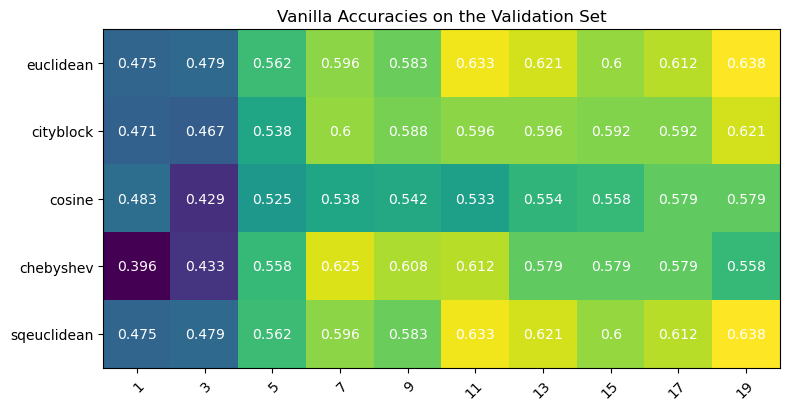

In [67]:
#Making a Numpy array of vanilla accuracy
vanilla_accuracy = df_vanilla["Accuracy"].values
vanilla_accuracy = vanilla_accuracy.reshape(5,10) #Reshape to prepare for the desired heatmap
vanilla_accuracy = np.around(vanilla_accuracy, decimals=3)#Rounding accuracies to 3 decimal places

fig, ax = plt.subplots(figsize=(8,8), ncols=1)
im = ax.imshow(vanilla_accuracy)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_values)))
ax.set_yticks(np.arange(len(metrics)))

# ... and label them with the respective list entries
ax.set_xticklabels(k_values)
ax.set_yticklabels(metrics)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metrics)):
    for j in range(len(k_values)):
        text = ax.text(j, i, vanilla_accuracy[i, j],
                       ha="center", va="center", color="w")
        
ax.set_title("Vanilla Accuracies on the Validation Set")
fig.tight_layout()
plt.show()


### Ball

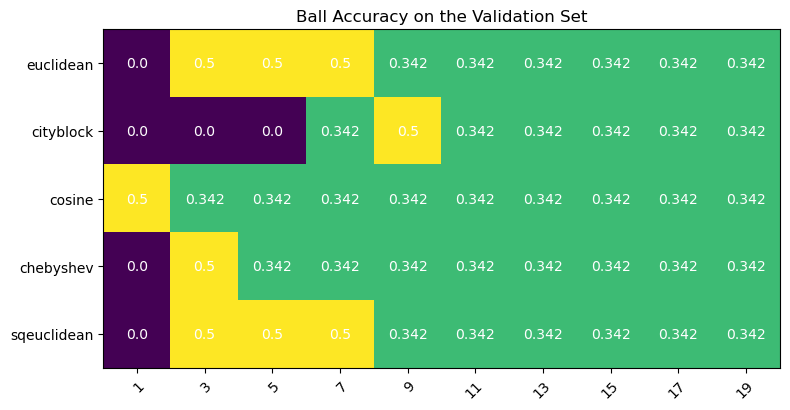

In [66]:
#Making a Numpy array of Ball accuracy
ball_accuracy = df_ball["Accuracy"].values
ball_accuracy = ball_accuracy.reshape(5,10)#Reshape to prepare for the desired heatmap
ball_accuracy = np.around(ball_accuracy, decimals=3)#Rounding accuracies to 3 decimal places

fig, ax = plt.subplots(figsize=(8,8), ncols=1)
im = ax.imshow(ball_accuracy)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_values)))
ax.set_yticks(np.arange(len(metrics)))

# ... and label them with the respective list entries
ax.set_xticklabels(k_values)
ax.set_yticklabels(metrics)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metrics)):
    for j in range(len(k_values)):
        text = ax.text(j, i, ball_accuracy[i, j],
                       ha="center", va="center", color="w")
        
ax.set_title("Ball Accuracy on the Validation Set")
fig.tight_layout()
plt.show()


## Train Heatmap

### Vanilla

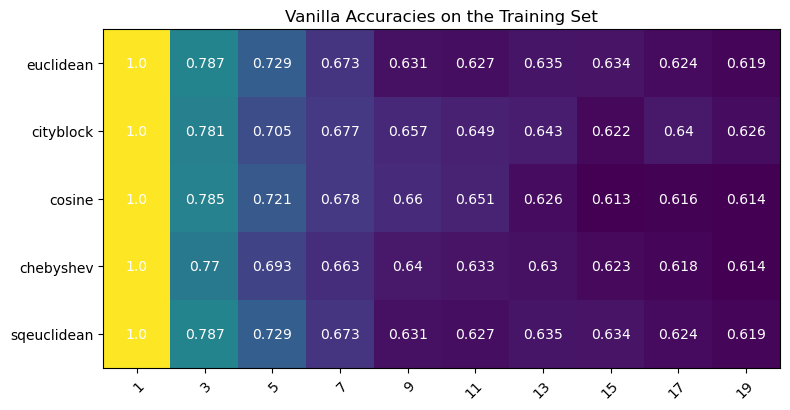

In [58]:
#Making a Numpy array of vanilla accuracy
train_vanilla_accuracy = train_df_vanilla["Accuracy"].values
train_vanilla_accuracy = train_vanilla_accuracy.reshape(5,10)#Reshape to prepare for the desired heatmap
train_vanilla_accuracy = np.around(train_vanilla_accuracy, decimals=3)#Rounding accuracies to 3 decimal places

fig, ax = plt.subplots(figsize=(8,8), ncols=1)
im = ax.imshow(train_vanilla_accuracy)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_values)))
ax.set_yticks(np.arange(len(metrics)))

# ... and label them with the respective list entries
ax.set_xticklabels(k_values)
ax.set_yticklabels(metrics)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metrics)):
    for j in range(len(k_values)):
        text = ax.text(j, i, train_vanilla_accuracy[i, j],
                       ha="center", va="center", color="w")
        
ax.set_title("Vanilla Accuracies on the Training Set")
fig.tight_layout()
plt.show()


### Ball

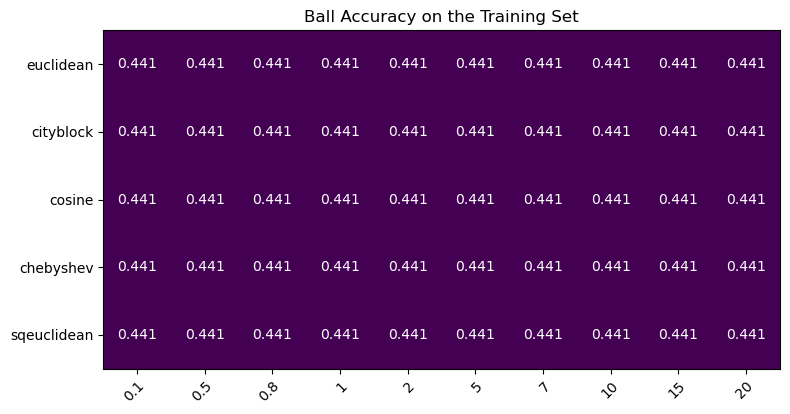

In [59]:
#Making a Numpy array of Ball accuracy
train_ball_accuracy = train_df_ball["Accuracy"].values
train_ball_accuracy = train_ball_accuracy.reshape(5,10)#Reshape to prepare for the desired heatmap
train_ball_accuracy = np.around(train_ball_accuracy, decimals=3)#Rounding accuracies to 3 decimal places

fig, ax = plt.subplots(figsize=(8,8), ncols=1)
im = ax.imshow(train_ball_accuracy)

# We want to show all ticks...
ax.set_xticks(np.arange(len(e_values)))
ax.set_yticks(np.arange(len(metrics)))

# ... and label them with the respective list entries
ax.set_xticklabels(e_values)
ax.set_yticklabels(metrics)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metrics)):
    for j in range(len(k_values)):
        text = ax.text(j, i, train_ball_accuracy[i, j],
                       ha="center", va="center", color="w")
        
ax.set_title("Ball Accuracy on the Training Set")
fig.tight_layout()
plt.show()


## test Heatmap

### Vanilla

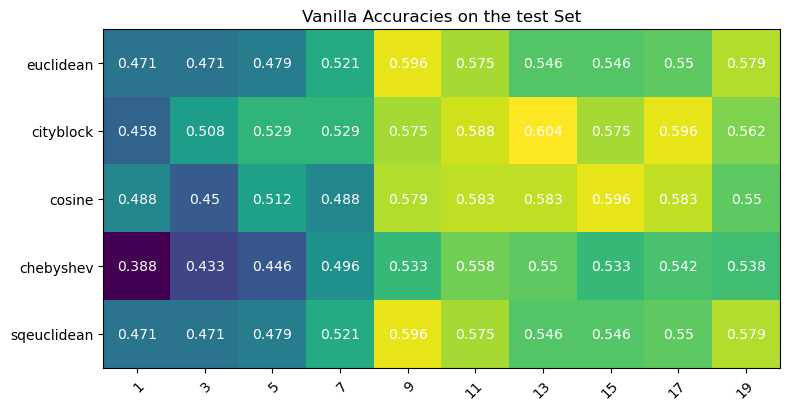

In [68]:
#Making a Numpy array of Vanilla accuracy
test_vanilla_accuracy = test_df_vanilla["Accuracy"].values
test_vanilla_accuracy = test_vanilla_accuracy.reshape(5,10)#Reshape to prepare for the desired heatmap
test_vanilla_accuracy = np.around(test_vanilla_accuracy, decimals=3)#Rounding accuracies to 3 decimal places

fig, ax = plt.subplots(figsize=(8,8), ncols=1)
im = ax.imshow(test_vanilla_accuracy)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_values)))
ax.set_yticks(np.arange(len(metrics)))

# ... and label them with the respective list entries
ax.set_xticklabels(k_values)
ax.set_yticklabels(metrics)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metrics)):
    for j in range(len(k_values)):
        text = ax.text(j, i, test_vanilla_accuracy[i, j],
                       ha="center", va="center", color="w")
        
ax.set_title("Vanilla Accuracies on the test Set")
fig.tight_layout()
plt.show()


### Ball

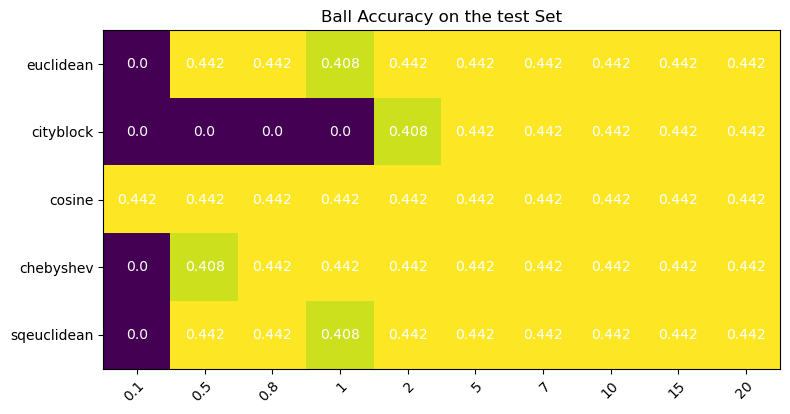

In [69]:
#Making a Numpy array of Ball accuracy
test_ball_accuracy = test_df_ball["Accuracy"].values
test_ball_accuracy = test_ball_accuracy.reshape(5,10)#Reshape to prepare for the desired heatmap
test_ball_accuracy = np.around(test_ball_accuracy, decimals=3)#Rounding accuracies to 3 decimal places

# fig = plt.figure(figsize=(15,5),facecolor='w') 
# ax = fig.add_subplot(111)
# ax.imshow(ball_accuracy, cmap=cm.jet)
fig, ax = plt.subplots(figsize=(8,8), ncols=1)
im = ax.imshow(test_ball_accuracy)

# We want to show all ticks...
ax.set_xticks(np.arange(len(e_values)))
ax.set_yticks(np.arange(len(metrics)))

# ... and label them with the respective list entries
ax.set_xticklabels(e_values)
ax.set_yticklabels(metrics)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metrics)):
    for j in range(len(k_values)):
        text = ax.text(j, i, test_ball_accuracy[i, j],
                       ha="center", va="center", color="w")
        
ax.set_title("Ball Accuracy on the test Set")
fig.tight_layout()
plt.show()


# A faster version of the k-NN classifier by using a kd-tree data structure

## Hyper Prameters

In [143]:
KDTree.valid_metrics

['euclidean',
 'l2',
 'minkowski',
 'p',
 'manhattan',
 'cityblock',
 'l1',
 'chebyshev',
 'infinity']

In [144]:
kd_methods = ["k_nearest" , "radius"]
kd_metrics = ["euclidean", "cityblock", "minkowski", "chebyshev", "manhattan" , "infinity"] #List of candidate distance functions
k_sizes = [1 , 3 , 5 , 7 , 9 , 11 , 13 , 15 , 17 , 19] #List of candidate number of neighbors (exclusively for vanilla)
r_sizes = [0.1 , 0.5, 0.8 , 1 , 2 , 5 , 7 , 10 , 15 ,20 ]#List of candidate radius of neighborhood (exclusively for ball)
leaf_sizes = [1,2,3,4,5,6,7,8,9,10]

* Trying different leaf_size , k and r on the model
* getting the mode of selected neighbors for both k and e methods
* comparing detected label woth real label for accuracy


## Train Dataset kdTree Prediction
### Query for neighbors within a given radius
### Query for Nearest Neighbors 

In [152]:
train_all_combo_pred_lst = []

for method in kd_methods:
    
    for metric in kd_metrics:
        
        for leaf_size in leaf_sizes:
        
            tree = KDTree(X_train, metric = metric, leaf_size=leaf_size)#Initialization of the tree object. The same for both methods
            
            
        
            if(method == "k_nearest"):

                for k_size in k_sizes: #We need two different for loop here for vanilla and ball

                    each_combo = []# 1-d list

                    nearest_ind = tree.query(X_train, k=k_size , return_distance = False)
                    #nearest neigh indexes type (numpy ndarray), shape (1119, 1) because in this loop k=1
#                     number of columns could be as large as maximum k
                    

                    prediction = np.zeros((X_train.shape[0], 1)) #we need to initialize the array #shape(1, 1119)
#                     prediction is type numpy.ndarray shape (1119, 1) all filled with zero
                    # it is constant for all k
                    

                    for i in range(nearest_ind.shape[0] - 1):#finding each sample k predictions labels

                        temp_top_k = [] #1-d list

                        for j in range(k_size):#if k=1 it should iterate one time

                            temp_top_k.append(Y_train[nearest_ind[i][j ]])

                        prediction[i] = mode(temp_top_k, axis=None).mode[0]

            




    #                 The function above gave me top k neighbors, while in my KNN class I had to find between 1118 neighbors
    #                 prediction = mode(top_k, axis=None).mode[0]
        #one mode for the k predictions of each 1119 samples as prediction 

                    accuracy = sum(prediction.flatten() == Y_train)/len(Y_train)

                    each_combo.append(method )
                    each_combo.append( metric )
                    each_combo.append(leaf_size)
                    each_combo.append(k_size)
                    each_combo.append(accuracy)

                    train_all_combo_pred_lst.append(each_combo) #list of lists of all 100 comb each containing above appends  

            elif(method == "radius"):

                for r_size in r_sizes:

                    each_combo = []

                    ind = tree.query_radius(X_train, r = r_size , count_only = False, return_distance = False)#ind will be shape(1119 , variable)

                    ind = ind.reshape(1119 , -1)#rows with number of samples, columns variable
                    # Query for 1119*k_size rows of indexes of neighbors within a given radius
#                     print(ind.shape)
                    prediction = np.zeros((X_train.shape[0], 1))

                    for i in range(ind.shape[0]):

                        temp_top_k = []

                        for j in range(len(ind[i])):

                            temp_top_k.append(Y_train[ind[i][j]])

                        prediction[i] = mode(temp_top_k, axis=None).mode[0]

                    accuracy = sum(prediction.flatten() == Y_train)/len(Y_train)
                    #accuracy type: numpy array

                    each_combo.append(method )
                    each_combo.append( metric )
                    each_combo.append(leaf_size)
                    each_combo.append(r_size)
                    each_combo.append(accuracy)

                    train_all_combo_pred_lst.append(each_combo) #list of lists of all 100 comb each containing above appends  


In [153]:
## DF of Test-Accuracy ( Different Hyperprameter Combinations)
train_df3 = pd.DataFrame(train_all_combo_pred_lst ,columns=[ 'kd_methods', 'kd_metrics','leaf_sizes' , 'k_values' ,'Accuracy'])
train_df3 = train_df3.round(3)
train_df3.head()

,kd_methods,kd_metrics,leaf_sizes,k_values,Accuracy
0,k_nearest,euclidean,1,1.0,0.999
1,k_nearest,euclidean,1,3.0,0.787
2,k_nearest,euclidean,1,5.0,0.728
3,k_nearest,euclidean,1,7.0,0.672
4,k_nearest,euclidean,1,9.0,0.630


In [154]:
# Statistical description of Train-Accuracy DF, Grouped by method
train_df3.groupby(["kd_methods"]).describe() 

leaf_sizes                                          k_values  \
                count mean       std  min  25%  50%  75%   max    count   
kd_methods                                                                
k_nearest       600.0  5.5  2.874678  1.0  3.0  5.5  8.0  10.0    600.0   
radius          600.0  5.5  2.874678  1.0  3.0  5.5  8.0  10.0    600.0   

                   ...             Accuracy                                    \
             mean  ...   75%   max    count      mean       std    min    25%   
kd_methods         ...                                                          
k_nearest   10.00  ...  15.0  19.0    600.0  0.693970  0.112425  0.605  0.626   
radius       6.14  ...  10.0  20.0    600.0  0.676267  0.235667  0.437  0.441   

                                  
               50%    75%    max  
kd_methods                        
k_nearest   0.6425  0.704  0.999  
radius      0.6095  0.945  1.000  

[2 rows x 24 columns]

In [155]:
## Splitting original DF to DFs of vanilla and ball
train_df3_radius =  train_df3[train_df3.kd_methods == 'radius'].rename(columns={'k_values':'r_values'})
train_df3_k_nearest =  train_df3[train_df3.kd_methods == 'k_nearest']
# df_ball.shape
# test_df_ball.head()
train_df3_radius.head()

,kd_methods,kd_metrics,leaf_sizes,r_values,Accuracy
600,radius,euclidean,1,0.1,1.000
601,radius,euclidean,1,0.5,0.987
602,radius,euclidean,1,0.8,0.939
603,radius,euclidean,1,1.0,0.881
604,radius,euclidean,1,2.0,0.633


In [156]:
## Maximum Accuracy (Vanilla method) Hyperprameter Configuration
train_df3_k_nearest.loc[train_df3_k_nearest['Accuracy'].idxmax()] 

kd_methods    k_nearest
kd_metrics    euclidean
leaf_sizes            1
k_values            1.0
Accuracy          0.999
Name: 0, dtype: object

In [157]:
## Maximum Accuracy (Ball method) Hyperprameter Configuration
train_df3_radius.loc[train_df3_radius['Accuracy'].idxmax()]

kd_methods       radius
kd_metrics    euclidean
leaf_sizes            1
r_values            0.1
Accuracy            1.0
Name: 600, dtype: object

In [150]:
## Maximum Accuracy (Ball method) Hyperprameter Configuration
train_df3_radius.loc[train_df3_radius['Accuracy'].idxmax()]

kd_methods       radius
kd_metrics    euclidean
leaf_sizes            1
r_values            0.1
Accuracy            1.0
Name: 600, dtype: object